<a href="https://colab.research.google.com/github/nileshmalode11/linear_regression_housing_dataset/blob/main/California_Housing__Dataset_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**California Housing Dataset Simple Linear Regression**

#**Index**

**1. Import the necessary library**

**2. Load dataset**

**3. Dataset information**

**4. Data Cleaning/wrangling**

**5. Summary of statistics**

**6. Visualize the distribution of the target variable using a histogram (Problem: Right Skewed)**

**7. Right Skewed Resolving : log-tranform the target variable**

**8. Right Skewed Resolving: Inverse Transformation of the target variable**

**9. Visualize the distribution of the predictor variable using a histogram (Problem: Outliers)**

**10. Correlation heatmap**

**11. Resolve Outliers: Using Inter-Quartile Range**

**12. Coclusion**

#**1. Import the necessary library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#**2. Load dataset**

In [2]:
# Loading the California Housing Dataset

housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
data=pd.DataFrame(housing['data'],columns=housing['feature_names'])
df=data.copy()

In [4]:
# Add the target variable to the dataframe

df['MedHouseVal']=housing['target']

# **3. Dataset information**

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.shape

(20640, 9)

In [7]:
df.size

185760

In [8]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Observation :**

* In this dataset we can observe their datatype & their total non null count.

#**4. Data Cleaning/wrangling**

In [10]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

**Observation :**

* In given dataset their is no missing value

#**5. Summary of statistics**

In [11]:
df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#**6.Correlation heatmap**

The correlation matrix shows the correlation coefficients between every pair of variables in the dataset
By analyzing the correlation matrix, we can determine which variables have the strongest correlation with the target variable (in this case, median income). These variables would be the best candidates for the independent variable in a simple linear regression model. We want to choose a variable with a high positive correlation coefficient because this indicates that an increase in that variable is associated with an increase in median income.

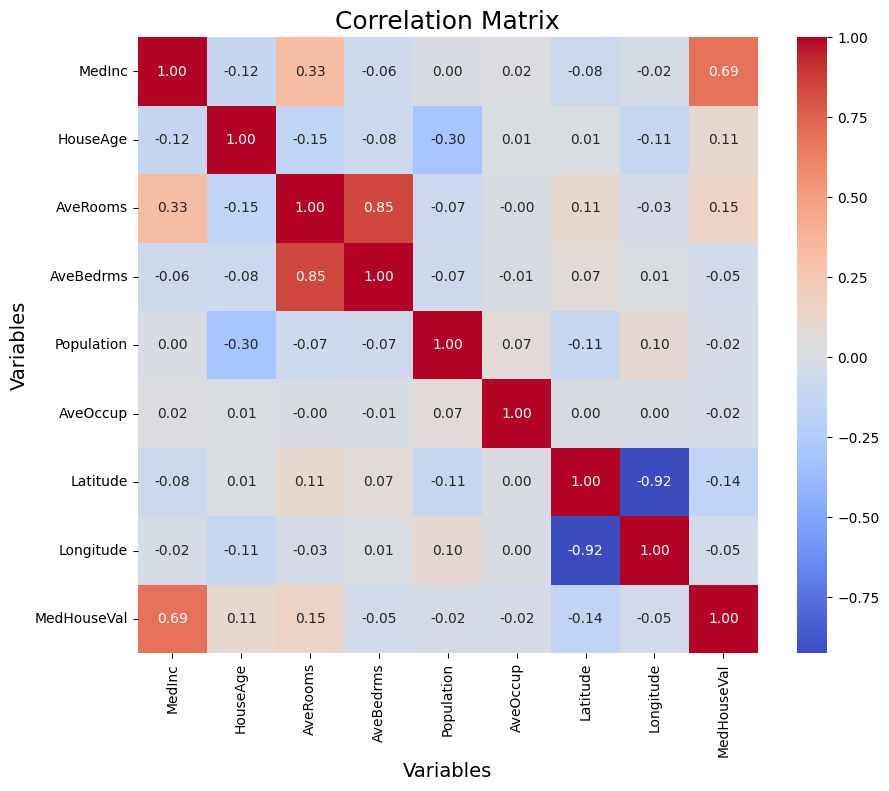

In [12]:
# Compute the correlation matrix

corr_matrix=df.corr()

# Create a customized heatmap

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix',fontsize=18)
plt.xlabel('Variables',fontsize=14)
plt.ylabel('Variables',fontsize=14)
plt.show()

**Observation :**

* A correlation coefficient ranges from -1 to 1 and measures the strength and direction of the linear relationship between two variables.

* A coefficient of -1 indicates a perfect negative correlation, a coefficient of 0 indicates no correlation, and a coefficient of 1 indicates a perfect positive correlation.

#**Visualize the distribution of the target variable using a histogram (Problem: Right Skewed)**

A skewed histogram indicates that the data is not normally distributed and has a tendency to cluster towards one end. This can impact the target variable as it may introduce bias in the analysis and modeling process. Additionally, certain statistical measures such as the mean and standard deviation may not be appropriate for skewed data. Therefore, it is important to address skewness in the data before proceeding with any analysis or modeling.

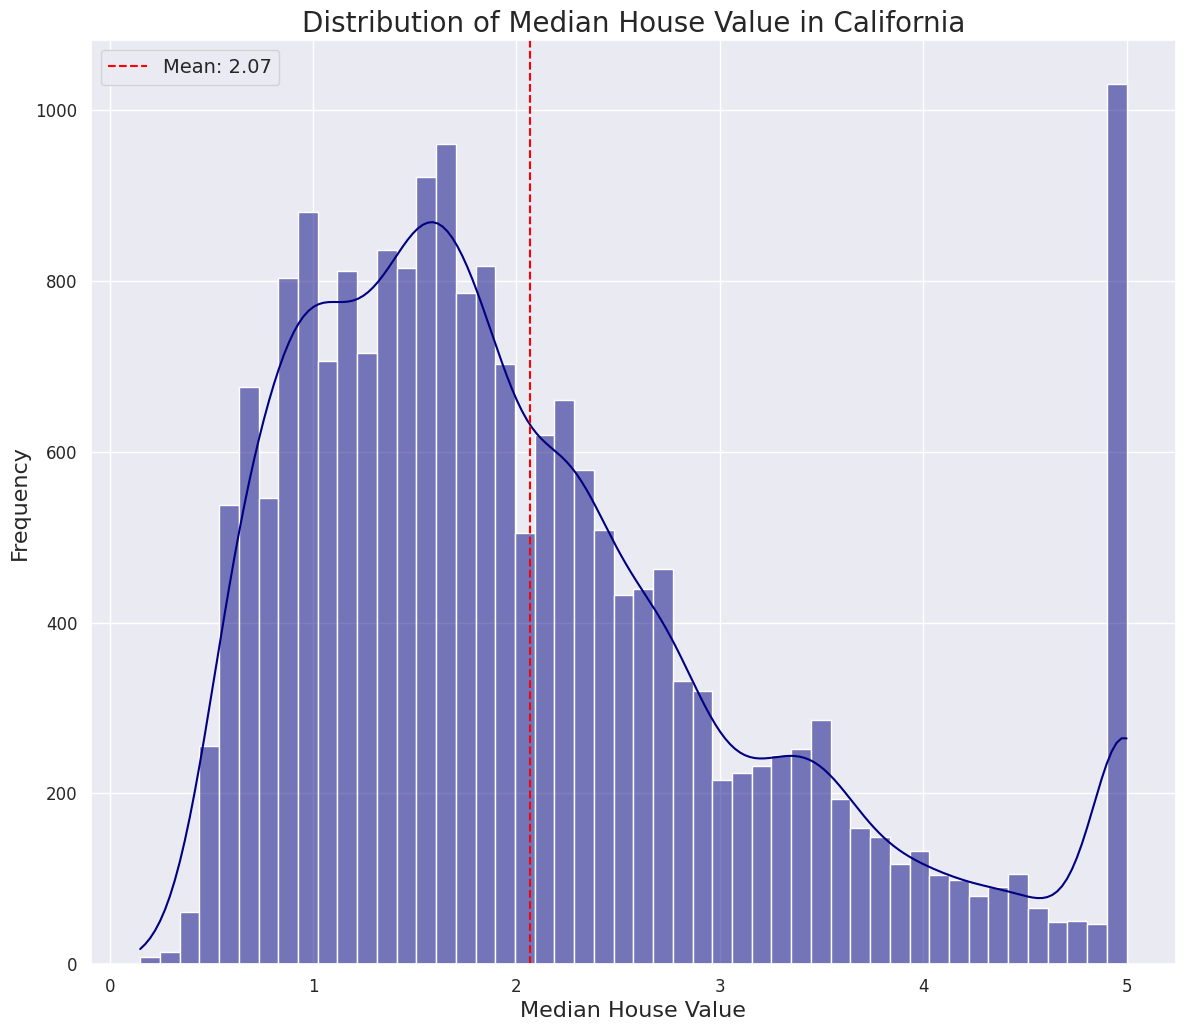

In [13]:
# Set figure size and font scale

plt.figure(figsize=(14, 12))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df, x='MedHouseVal', kde=True, bins=50,color='navy')

# Set x and y axis Labels and title

plt.xlabel('Median House Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Median House Value in California', fontsize=20)

# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean

mean =df['MedHouseVal'].mean()

plt.axvline(mean, color='red', linestyle='--',label=f'Mean: {mean:.2f}')
plt.legend (fontsize=14)
plt.show()

#**Right Skewed Resolving : log-tranform the target variable**

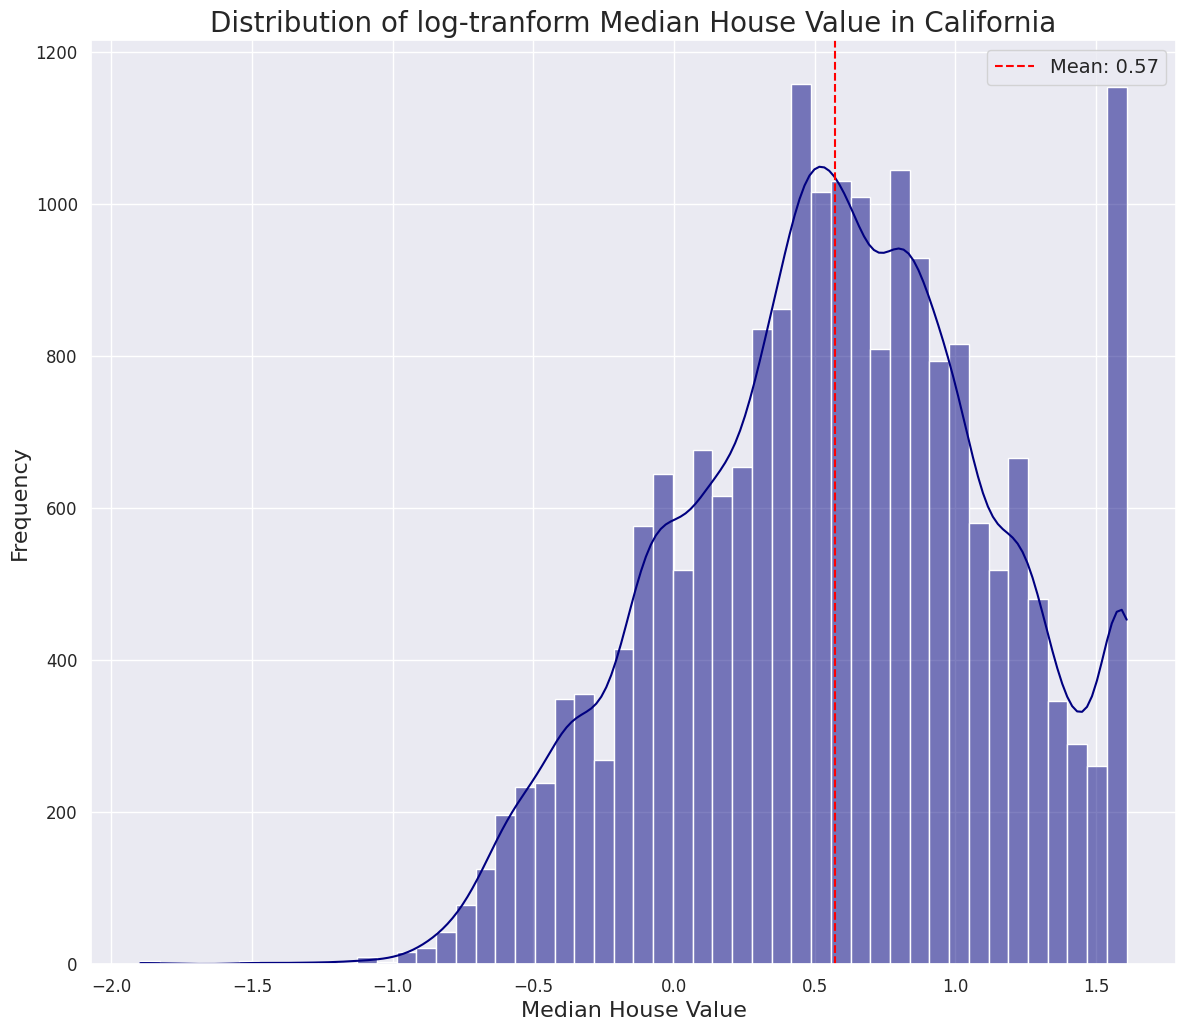

In [14]:
df['MedHouseVal_log']=np.log(df['MedHouseVal'])

# Set figure size and font scale
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df, x='MedHouseVal_log', kde=True, bins=50,color='navy')

# Set x and y axis Labels and title

plt.xlabel('Median House Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of log-tranform Median House Value in California', fontsize=20)

# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean =df['MedHouseVal_log'].mean()
plt.axvline(mean, color='red', linestyle='--',label=f'Mean: {mean:.2f}')
plt.legend (fontsize=14)

plt.show()

#**Right Skewed Resolving: Inverse Transformation of the target variable**

The distribution of the inverse-transformed target variable is left-skewed. The inverse transformation did not improve the distribution of the target variable, and the resulting distribution is not suitable for linear regression analysis.

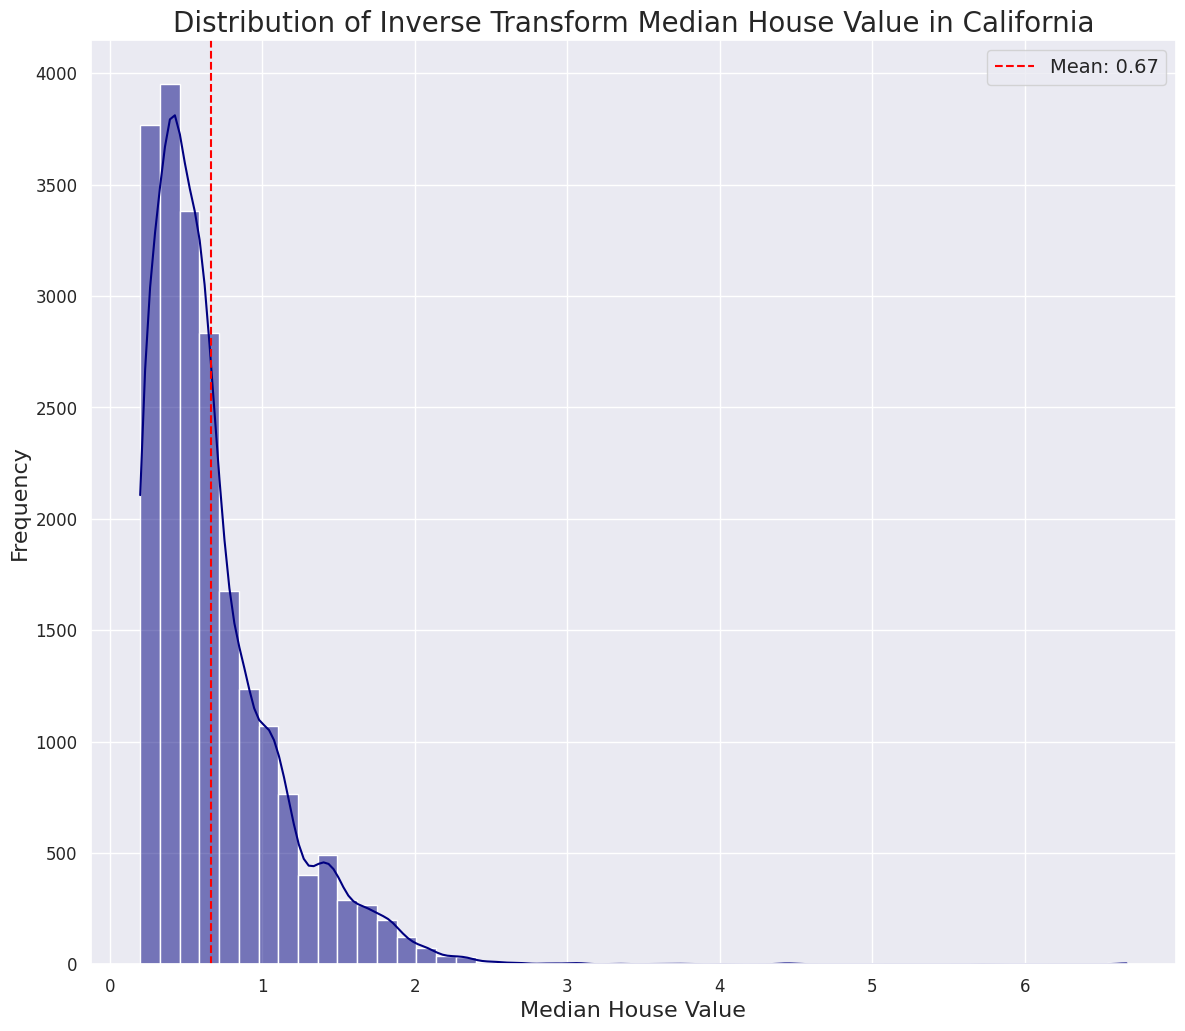

In [15]:
df['MedHouseVal_inv']=1/df['MedHouseVal']

# Set figure size and font scale
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df, x='MedHouseVal_inv', kde=True, bins=50,color='navy')

# Set x and y axis Labels and title

plt.xlabel('Median House Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Inverse Transform Median House Value in California', fontsize=20)

# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean =df['MedHouseVal_inv'].mean()
plt.axvline(mean, color='red', linestyle='--',label=f'Mean: {mean:.2f}')
plt.legend (fontsize=14)

plt.show()

#**Resolve Skew: Square Root Transformation**

The resulting histogram shows a more symmetric distribution with less right skewness compared to the original distribution. This indicates that the square root transformation has effectively reduced the skewness in the data

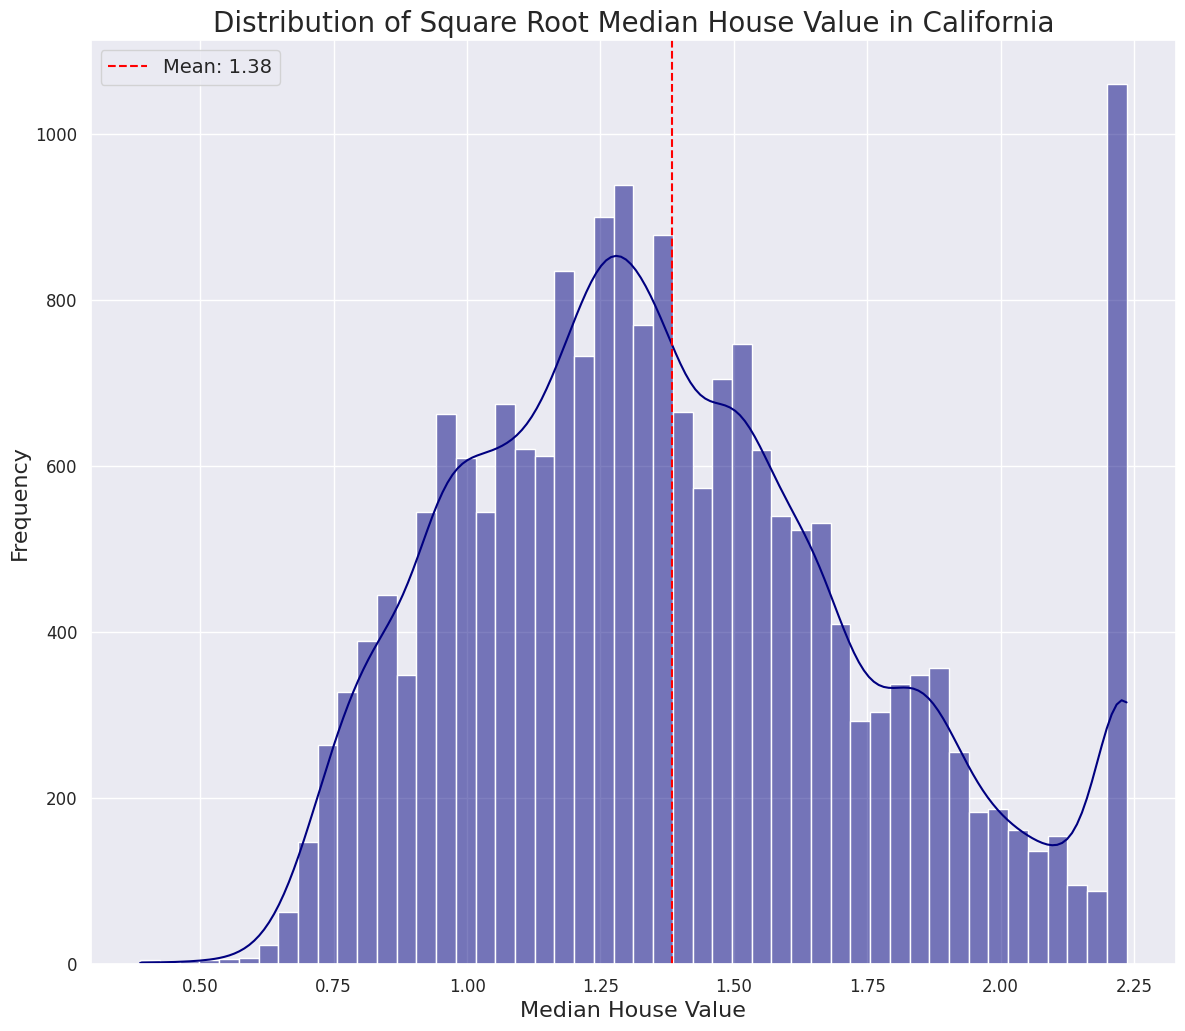

In [16]:
df['sqrt_MedHouseVal']=np.sqrt(df['MedHouseVal'])

# Set figure size and font scale
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df, x='sqrt_MedHouseVal', kde=True, bins=50,color='navy')

# Set x and y axis Labels and title

plt.xlabel('Median House Value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Square Root Median House Value in California', fontsize=20)

# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean =df['sqrt_MedHouseVal'].mean()
plt.axvline(mean, color='red', linestyle='--',label=f'Mean: {mean:.2f}')
plt.legend (fontsize=14)

plt.show()

#**Visualize the distribution of the predictor variable using a histogram (Problem: Outliers)**

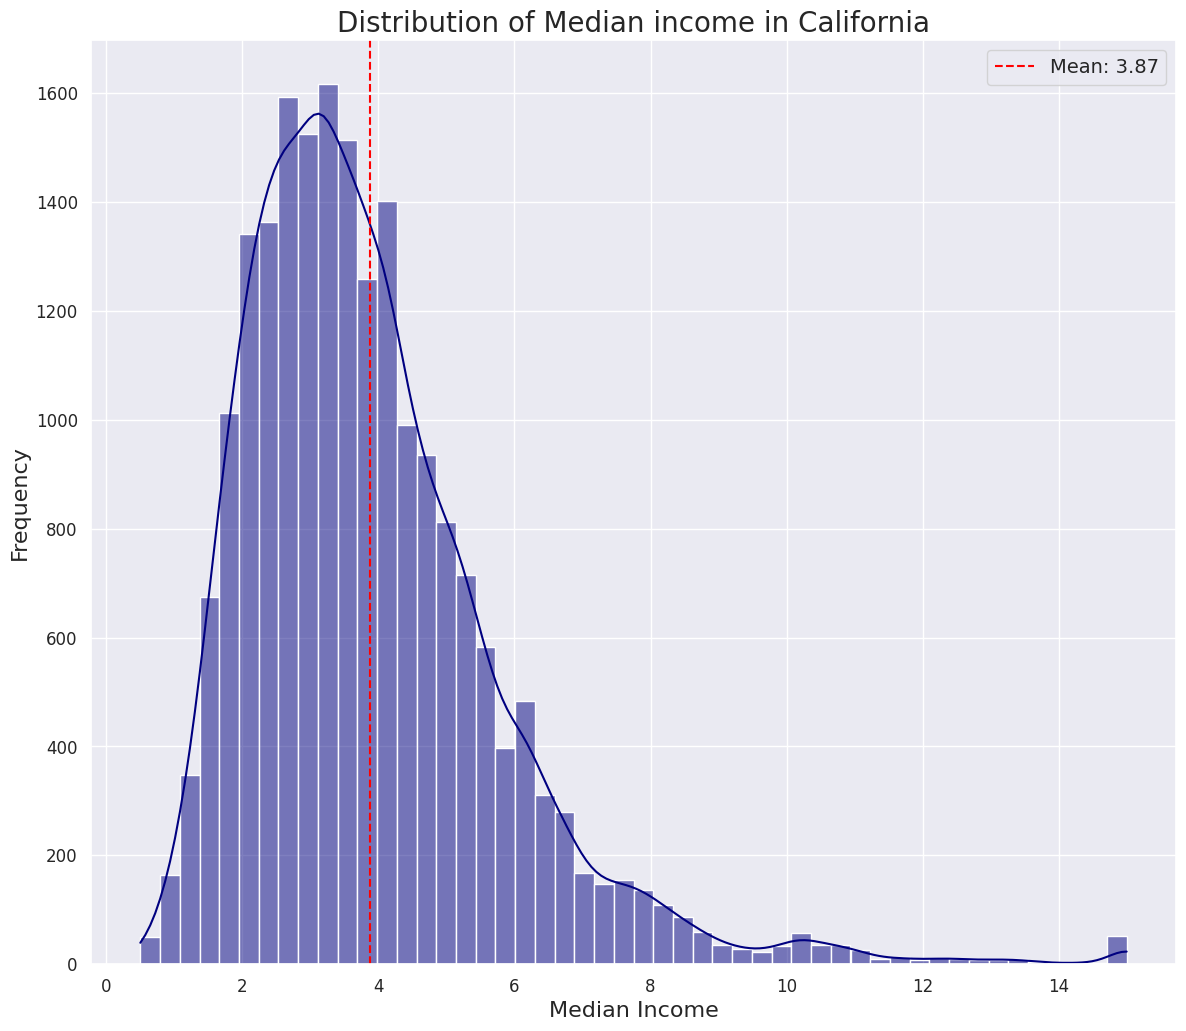

In [17]:
# Set figure size and font scale
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=df, x='MedInc', kde=True, bins=50,color='navy')

# Set x and y axis Labels and title

plt.xlabel('Median Income', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Median income in California', fontsize=20)

# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean =df['MedInc'].mean()
plt.axvline(mean, color='red', linestyle='--',label=f'Mean: {mean:.2f}')
plt.legend (fontsize=14)

plt.show()

#**Resolve Outliers: Using Inter-Quartile Range**

In [18]:
# Calculate the first and third quartiles

Q1= df['MedInc'].quantile (0.25)
Q3= df['MedInc'].quantile (0.75)

# Calculate the IQR IQR Q3 Q1
IQR=Q3-Q1

# Define the Lower and upper bounds for outlier detection

lower_bound = Q1-1.5*IQR
upper_bound = Q3+ 1.5*IQR

# Create a new dataframe without outliers
california_df_no_outliers=df[(df['MedInc'] >= lower_bound)]

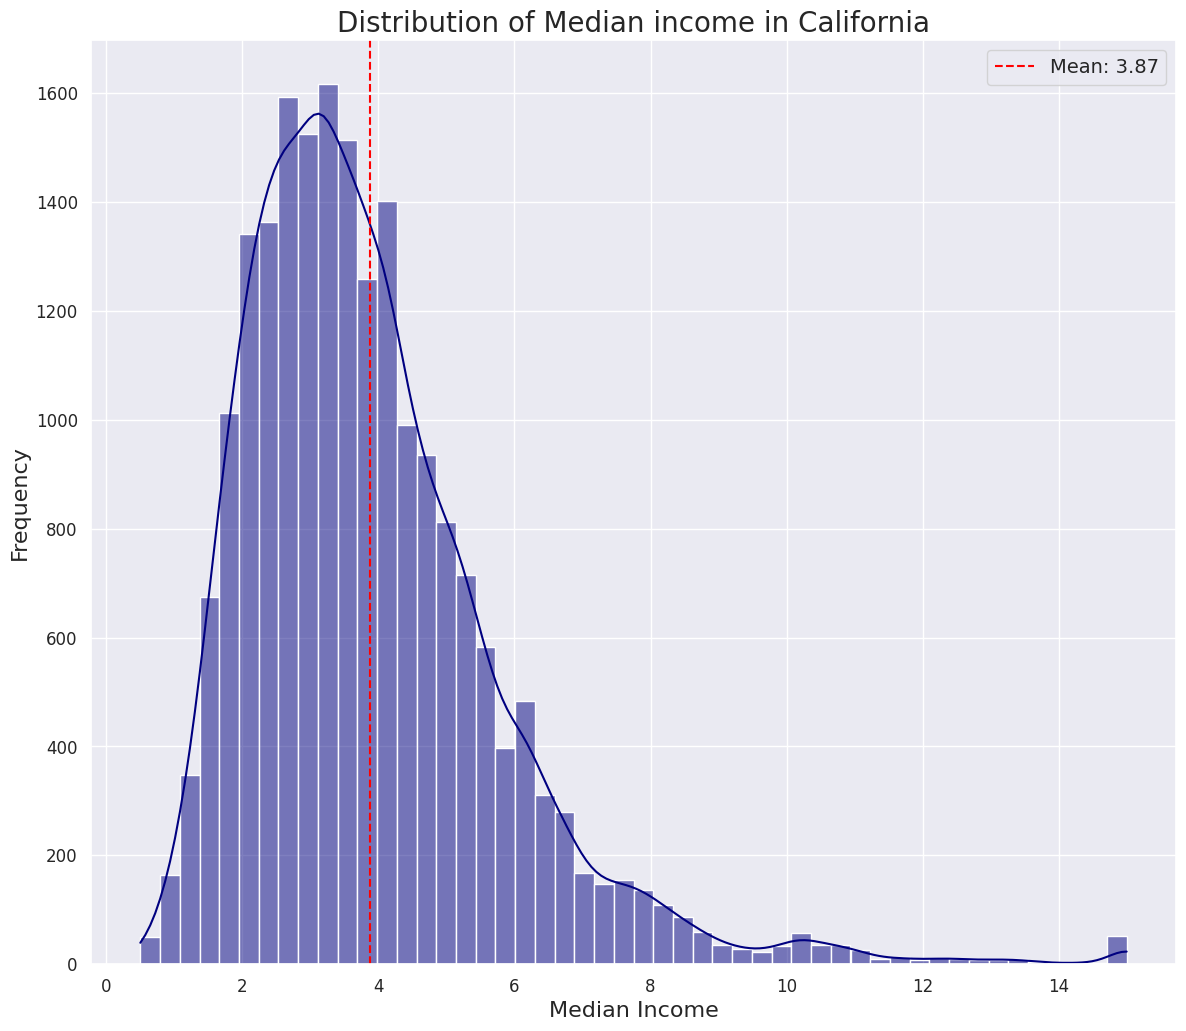

In [19]:
# Set figure size and font scale
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.5)

# Create histogram
sns.histplot(data=california_df_no_outliers, x='MedInc', kde=True, bins=50,color='navy')

# Set x and y axis Labels and title

plt.xlabel('Median Income', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Median income in California', fontsize=20)

# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for mean
mean =df['MedInc'].mean()
plt.axvline(mean, color='red', linestyle='--',label=f'Mean: {mean:.2f}')
plt.legend (fontsize=14)

plt.show()

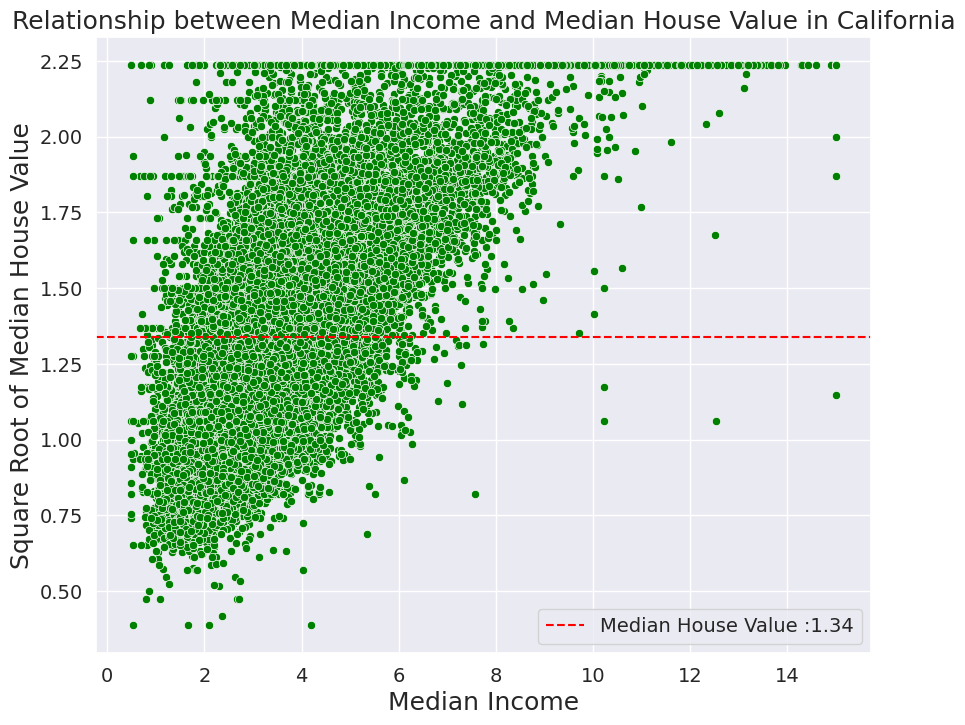

In [20]:
# Set figure size and font scale
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)

# Create scatter plot
sns.scatterplot(data=california_df_no_outliers, x='MedInc', y='sqrt_MedHouseVal',color='green')

# Set x and y axis Labels and title

plt.xlabel('Median Income', fontsize=18)

plt.ylabel('Square Root of Median House Value', fontsize=18)

plt.title('Relationship between Median Income and Median House Value in California')

# Customize x and y axis tick marks and Labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add horizontal line for median house value

median_house_value = california_df_no_outliers ['sqrt_MedHouseVal'].median()
plt.axhline(median_house_value, color='red', linestyle='--', label=f'Median House Value :{median_house_value:.2f}')
plt.legend (fontsize=14)

#Show the plot

plt.show()

#**Train Test split data :**

In [21]:
X=california_df_no_outliers.drop(['MedHouseVal'],axis=1)
y=california_df_no_outliers.MedHouseVal

In [22]:
# train test split data as 70:30

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0,test_size=0.3)

#**Performance of simple linear regression**

In [23]:
lr=LinearRegression()

In [40]:
intercept_grid= {'fit_intercept': [True, False],'copy_X':[True, False],"n_jobs":[1,2]}

In [41]:
# Use cross-validation to find the best intercept value
grid_search=GridSearchCV(lr,intercept_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 2]})

In [42]:
# Fit the Linear regression model with the best intercept value
lr =grid_search.best_estimator_
lr.fit(X_train,y_train)

LinearRegression(n_jobs=1)

In [43]:
# Predict the median house value using the test data
y_pred = lr.predict(X_test)

In [44]:
# regression coefficients
print('Coefficients: ', lr.coef_)

Coefficients:  [ 2.85195377e-03  6.49473143e-05 -2.44733923e-03  1.18433375e-02
  2.62127949e-07 -2.90798936e-05  8.19263299e-04  1.30905952e-03
 -2.85683775e+00 -5.00780601e-01  6.60223231e+00]


In [45]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lr.score(X_test, y_test)))

Variance score: 0.9997305652788229


In [50]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

0.014596515696308359


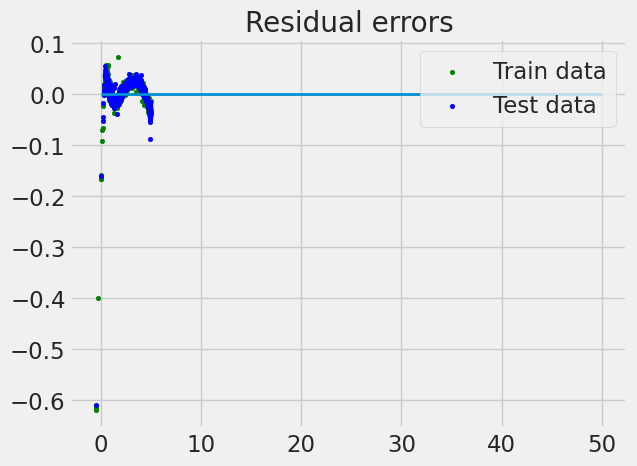

In [46]:
# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(lr.predict(X_train),
            lr.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(lr.predict(X_test),
            lr.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

#**Conclusion**

* In this simple linear regression tutorial, we explored how to use linear regression to model the relationship between two variables, specifically the median income and median house value in California. We started by loading and cleaning the dataset, and then visualizing the relationship between the two variables.

* Next, we split the data into training and testing sets and used linear regression to fit a model to the training data. We then used the model to make predictions on the test data and evaluated the model's performance using mean squared error and R-squared score.

* To further optimize our model, we used hyperparameter tuning with GridSearchCV to find the best intercept value. Finally, we fit the linear regression model with the best intercept value, made predictions on the test data, and evaluated the model's performance using mean squared error and R-squared score.

* Overall, simple linear regression is a powerful tool for modeling the relationship between two variables and making predictions. However, it is important to properly clean and preprocess the data, and to evaluate the model's performance using appropriate metrics.